In [13]:
# https://github.com/zergtant/pytorch-handbook/blob/master/chapter3/3.2-mnist.ipynb
# https://blog.csdn.net/qq_45588019/article/details/120935828
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
torch.__version__

'2.4.1+cu121'

In [15]:
transform = transforms.Compose(
    [
        # 将图像从PIL格式或numpy数组转换为PyTorch的张量格式,并且将像素值从[0, 255]缩放到[0, 1]。
        transforms.ToTensor(),
        # 对图像的每个通道进行标准化。这里使用的均值和标准差都是0.5
        # 标准化后像素值 = (原来的像素值-0.5)/0.5
        # transforms.Normalize((0.5,), (0.5,))
        # 使用的是 MNIST 数据集的实际均值和标准差
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

In [16]:
train_dataset = datasets.MNIST("./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST("./data", train=False, transform=transform)
BATCH_SIZE=1024
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)
test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

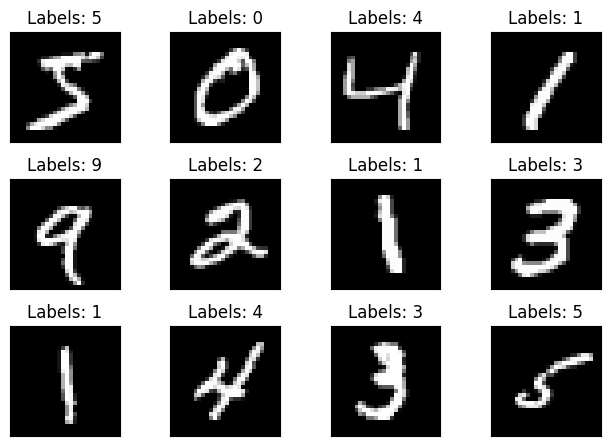

In [17]:
from matplotlib import pyplot as plt
fig = plt.figure()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.tight_layout()
    plt.imshow(train_dataset.train_data[i], cmap='gray', interpolation='none')
    plt.title("Labels: {}".format(train_dataset.train_labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()


In [23]:
class Net(torch.nn.Module):  # 定义一个继承自nn.Module的神经网络类
    def __init__(self):  # 初始化网络结构
        super(Net, self).__init__()  # 调用父类的构造函数
        self.conv1 = torch.nn.Sequential(  # 第一个卷积层及其激活函数和池化层
            torch.nn.Conv2d(1, 10, kernel_size=5),  # 卷积层：输入通道数为1,输出通道数为10,卷积核大小为5x5
            torch.nn.ReLU(),  # ReLU激活函数
            torch.nn.MaxPool2d(kernel_size=2),  # 最大池化层：池化窗口大小为2x2
        )
        self.conv2 = torch.nn.Sequential(  # 第二个卷积层及其激活函数和池化层
            torch.nn.Conv2d(10, 20, kernel_size=5),  # 卷积层：输入通道数为10,输出通道数为20,卷积核大小为5x5
            torch.nn.ReLU(),  # ReLU激活函数
            torch.nn.MaxPool2d(kernel_size=2),  # 最大池化层：池化窗口大小为2x2
        )
        self.fc = torch.nn.Sequential(  # 全连接层
            torch.nn.Linear(320, 50),  # 全连接层：输入320个节点,输出50个节点
            torch.nn.Linear(50, 10),  # 全连接层：输入50个节点,输出10个节点(对应10类分类）
        )

    def forward(self, x):  # 定义前向传播的过程
        batch_size = x.size(0)  # 获取输入数据的批量大小
        x = self.conv1(x)  # 通过第一个卷积层
        x = self.conv2(x)  # 通过第二个卷积层
        x = x.view(batch_size, -1)  # (batch_size,20,4,4) ==> (batch_size,320)
        x = self.fc(x)  # 通过全连接层
        return x  # 返回输出
'''
输入图像的大小：假设输入的图像大小是 28x28(例如 MNIST 手写数字识别数据集中的图像大小）。步长默认为 1,填充(padding)默认为 0。

第一个卷积层：

卷积核大小为 5x5,因此每个卷积操作后图像大小会减少 (5-1),即减少 4 个像素。
因此,卷积后的图像大小为 28 - 4 = 24。
然后经过一个 2x2 的最大池化层,池化层会将图像尺寸减半,最终输出图像大小为 24/2 = 12。
输出的通道数为 10(由卷积层定义）,所以卷积层后的输出形状是 10x12x12。
第二个卷积层：

卷积核大小仍为 5x5,因此图像大小再次减少 (5-1),即减少 4 个像素。
卷积后的图像大小为 12 - 4 = 8。
然后再次经过一个 2x2 的最大池化层,图像尺寸再次减半,最终输出图像大小为 8/2 = 4。
输出的通道数为 20(由第二个卷积层定义）,因此卷积层的最终输出形状为 20x4x4。
展平为一维向量：在传入全连接层之前,需要将卷积层输出的三维张量展平为一维向量。20x4x4 展平后为 20 * 4 * 4 = 320。

因此,输入全连接层时,节点数就是 320。
'''

'\n输入图像的大小：假设输入的图像大小是 28x28(例如 MNIST 手写数字识别数据集中的图像大小）。步长默认为 1,填充(padding)默认为 0。\n\n第一个卷积层：\n\n卷积核大小为 5x5,因此每个卷积操作后图像大小会减少 (5-1),即减少 4 个像素。\n因此,卷积后的图像大小为 28 - 4 = 24。\n然后经过一个 2x2 的最大池化层,池化层会将图像尺寸减半,最终输出图像大小为 24/2 = 12。\n输出的通道数为 10(由卷积层定义）,所以卷积层后的输出形状是 10x12x12。\n第二个卷积层：\n\n卷积核大小仍为 5x5,因此图像大小再次减少 (5-1),即减少 4 个像素。\n卷积后的图像大小为 12 - 4 = 8。\n然后再次经过一个 2x2 的最大池化层,图像尺寸再次减半,最终输出图像大小为 8/2 = 4。\n输出的通道数为 20(由第二个卷积层定义）,因此卷积层的最终输出形状为 20x4x4。\n展平为一维向量：在传入全连接层之前,需要将卷积层输出的三维张量展平为一维向量。20x4x4 展平后为 20 * 4 * 4 = 320。\n\n因此,输入全连接层时,节点数就是 320。\n'

In [24]:
EPOCHS = 20
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(DEVICE)
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [25]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if (batch_idx + 1) % 30 == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.item(),
                )
            )


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(
                output, target, reduction="sum"
            ).item()  # 将一批的损失相加
            pred = output.max(1, keepdim=True)[1]  # 找到概率最大的下标
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(
        "\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss,
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

In [26]:
for epoch in range(1, EPOCHS + 1):
    train(model, DEVICE, train_loader, optimizer, epoch)
    test(model, DEVICE, test_loader)

Train Epoch: 1 [29696/60000 (49%)]	Loss: -149.758179

Test set: Average loss: -3749.2133, Accuracy: 974/10000 (10%)

Train Epoch: 2 [29696/60000 (49%)]	Loss: -28467.498047

Test set: Average loss: -139043.4248, Accuracy: 974/10000 (10%)

Train Epoch: 3 [29696/60000 (49%)]	Loss: -429355.906250

Test set: Average loss: -1115262.7776, Accuracy: 974/10000 (10%)

Train Epoch: 4 [29696/60000 (49%)]	Loss: -2339271.250000

Test set: Average loss: -4588811.9040, Accuracy: 974/10000 (10%)

Train Epoch: 5 [29696/60000 (49%)]	Loss: -7964516.500000

Test set: Average loss: -13178875.8016, Accuracy: 974/10000 (10%)

Train Epoch: 6 [29696/60000 (49%)]	Loss: -20225370.000000

Test set: Average loss: -30362716.9792, Accuracy: 974/10000 (10%)

Train Epoch: 7 [29696/60000 (49%)]	Loss: -42735084.000000

Test set: Average loss: -60307755.0080, Accuracy: 974/10000 (10%)

Train Epoch: 8 [29696/60000 (49%)]	Loss: -80201776.000000

Test set: Average loss: -107912485.2736, Accuracy: 974/10000 (10%)

Train Epoch